In [18]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense ,Dropout
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

In [19]:
df = pd.read_csv("gas_turbines.csv")
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [20]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

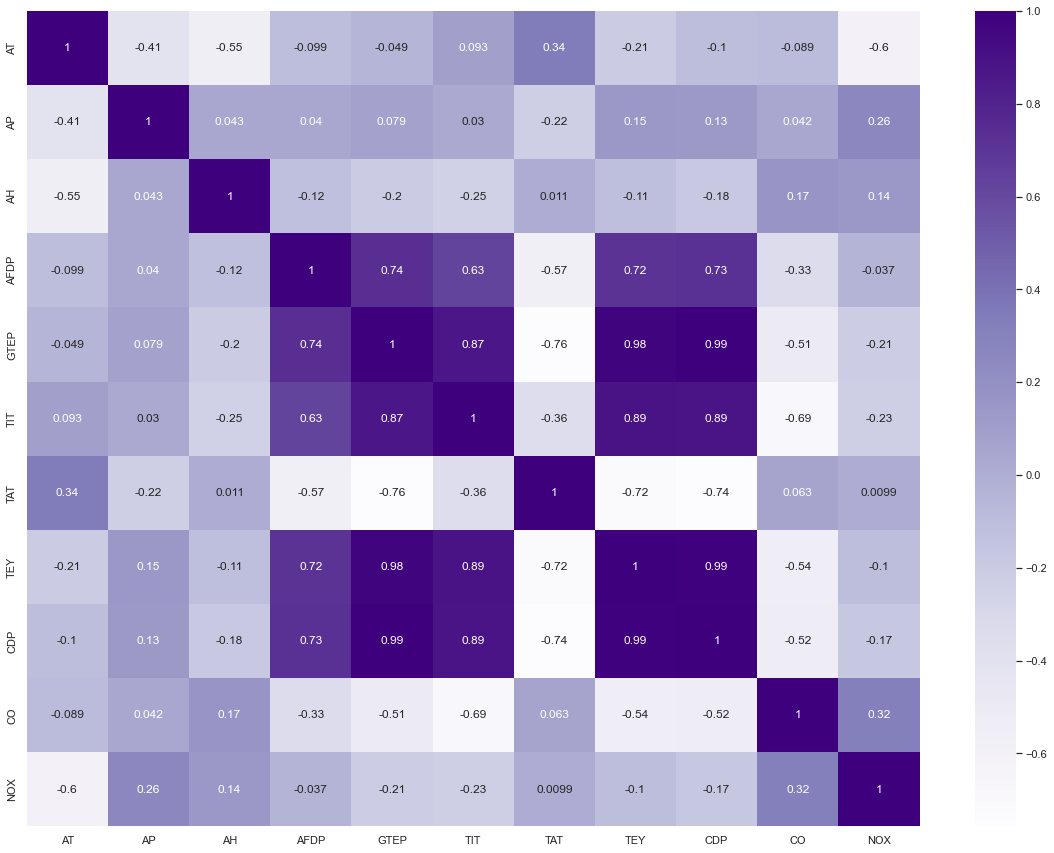

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
c=df.corr()
sns.heatmap(c,annot=True,cmap='Purples')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [23]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

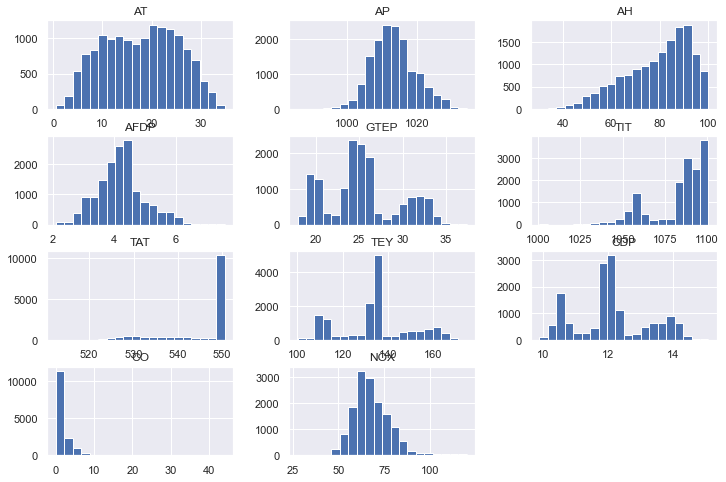

In [24]:
df.hist(figsize=(12,8),bins=20)
plt.show()

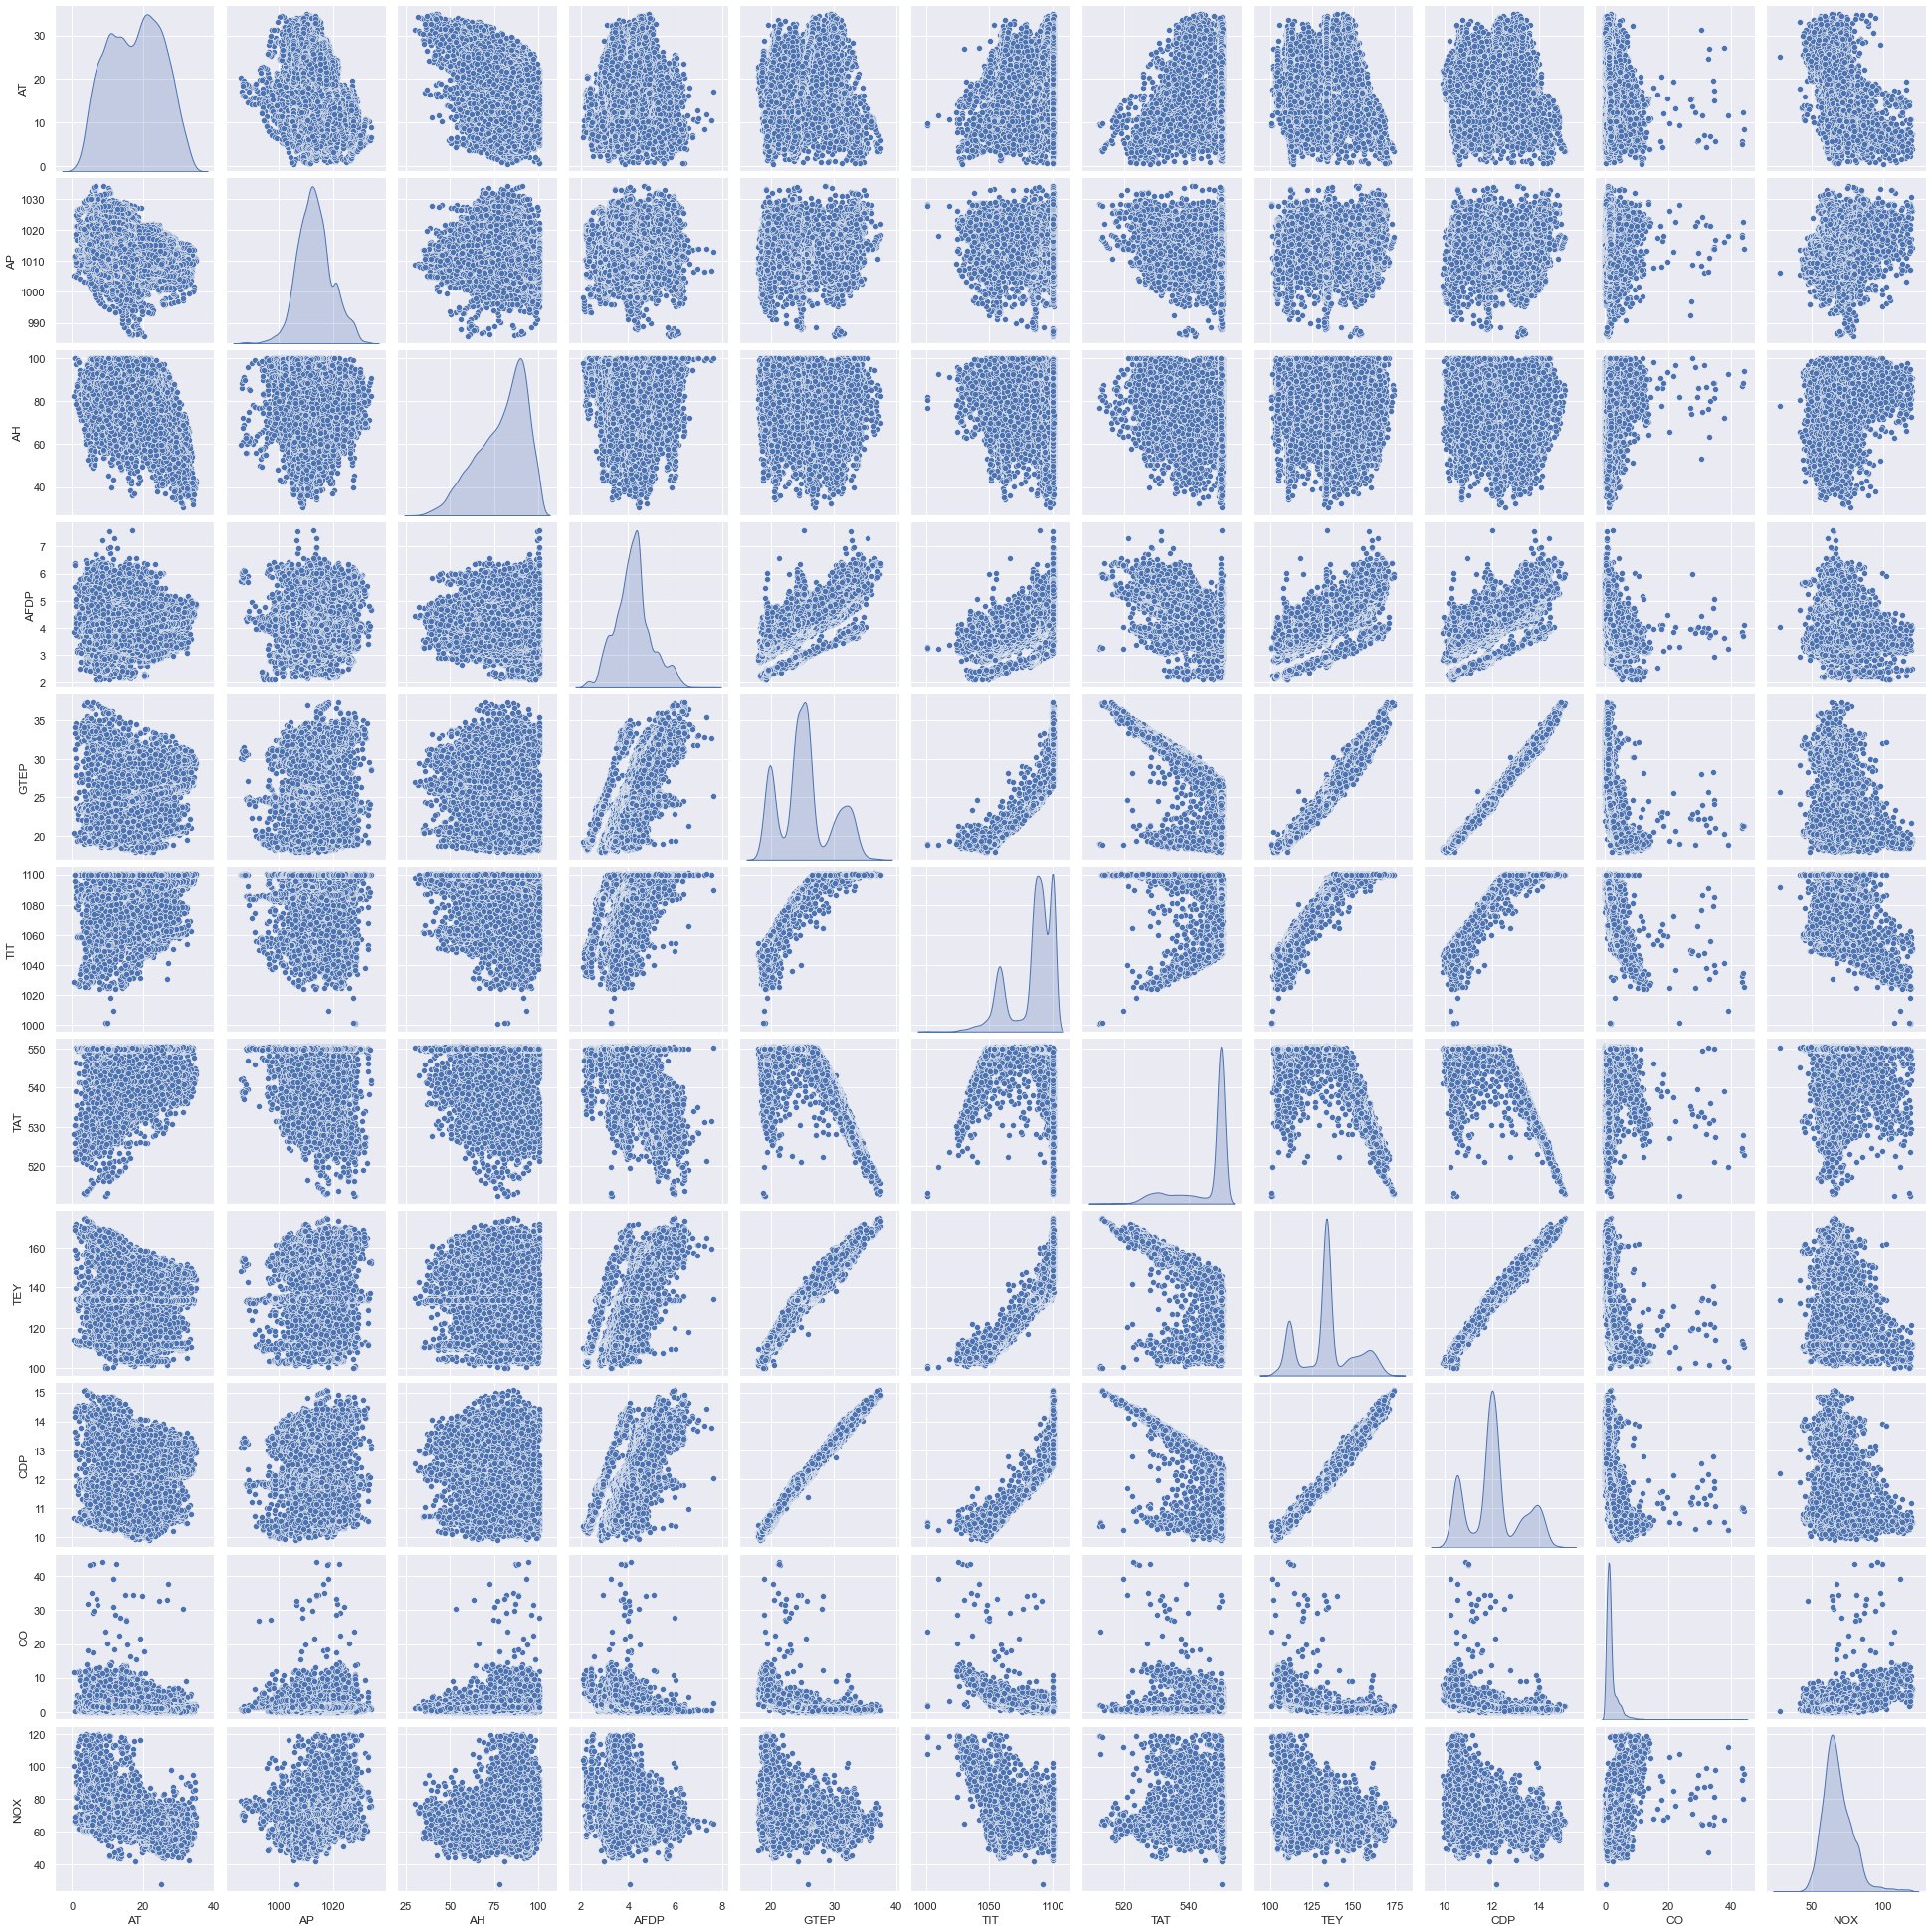

In [25]:
sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(df, diag_kind='kde')   

In [26]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:3]
y = df.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(
     X,y, test_size=0.3, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (10527, 3)
train size y :  (10527,)
test size X :  (4512, 3)
test size y :  (4512,)


# Hyperparameter Tuning

# Batch size and epoch

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError
mse = MeanSquaredError()

# create model
def create_model():
    model = Sequential()
    model.add(Dense(6,  activation='relu'))
    model.add(Dense(3,  activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    adam = Adam(lr = 0.001)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[mse])
    return model

In [41]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0)
from sklearn.model_selection import GridSearchCV, KFold
# Define the grid search parameters
batch_size = [1000,2000,5000]
epochs = [100,500,1000]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_14284/2791273684.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=1000, epochs=100.................................
[CV 1/5; 1/9] END batch_size=1000, epochs=100;, score=-1470.931 total time=   1.3s
[CV 2/5; 1/9] START batch_size=1000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END batch_size=1000, epochs=100;, score=-18269.268 total time=   1.2s
[CV 3/5; 1/9] START batch_size=1000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END batch_size=1000, epochs=100;, score=-8972.979 total time=   1.4s
[CV 4/5; 1/9] START batch_size=1000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END batch_size=1000, epochs=100;, score=-1350.894 total time=   1.3s
[CV 5/5; 1/9] START batch_size=1000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END batch_size=1000, epochs=100;, score=-8114.737 total time=   1.3s
[CV 1/5; 2/9] START batch_size=1000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END batch_size=1000, epochs=500;, score=-350.290 total time=   4.8s
[CV 2/5; 2/9] START batch_size=1000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END batch_size=1000, epochs=500;, score=-18269.268 total time=   5.2s
[CV 3/5; 2/9] START batch_size=1000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END batch_size=1000, epochs=500;, score=-18293.217 total time=   4.9s
[CV 4/5; 2/9] START batch_size=1000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END batch_size=1000, epochs=500;, score=-391.076 total time=   4.9s
[CV 5/5; 2/9] START batch_size=1000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END batch_size=1000, epochs=500;, score=-18280.365 total time=   4.5s
[CV 1/5; 3/9] START batch_size=1000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END batch_size=1000, epochs=1000;, score=-18107.607 total time=   9.2s
[CV 2/5; 3/9] START batch_size=1000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END batch_size=1000, epochs=1000;, score=-18269.268 total time=   8.9s
[CV 3/5; 3/9] START batch_size=1000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END batch_size=1000, epochs=1000;, score=-229.310 total time=   9.1s
[CV 4/5; 3/9] START batch_size=1000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END batch_size=1000, epochs=1000;, score=-18470.305 total time=   8.7s
[CV 5/5; 3/9] START batch_size=1000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END batch_size=1000, epochs=1000;, score=-18280.365 total time=   9.6s
[CV 1/5; 4/9] START batch_size=2000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END batch_size=2000, epochs=100;, score=-18107.607 total time=   0.9s
[CV 2/5; 4/9] START batch_size=2000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END batch_size=2000, epochs=100;, score=-18269.268 total time=   0.9s
[CV 3/5; 4/9] START batch_size=2000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END batch_size=2000, epochs=100;, score=-18293.215 total time=   0.9s
[CV 4/5; 4/9] START batch_size=2000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END batch_size=2000, epochs=100;, score=-18470.307 total time=   1.0s
[CV 5/5; 4/9] START batch_size=2000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END batch_size=2000, epochs=100;, score=-12179.772 total time=   1.0s
[CV 1/5; 5/9] START batch_size=2000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END batch_size=2000, epochs=500;, score=-18107.607 total time=   3.4s
[CV 2/5; 5/9] START batch_size=2000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END batch_size=2000, epochs=500;, score=-414.131 total time=   3.3s
[CV 3/5; 5/9] START batch_size=2000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END batch_size=2000, epochs=500;, score=-389.483 total time=   3.3s
[CV 4/5; 5/9] START batch_size=2000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END batch_size=2000, epochs=500;, score=-18470.307 total time=   3.5s
[CV 5/5; 5/9] START batch_size=2000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END batch_size=2000, epochs=500;, score=-400.165 total time=   3.2s
[CV 1/5; 6/9] START batch_size=2000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END batch_size=2000, epochs=1000;, score=-18107.607 total time=   6.0s
[CV 2/5; 6/9] START batch_size=2000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END batch_size=2000, epochs=1000;, score=-368.789 total time=   5.8s
[CV 3/5; 6/9] START batch_size=2000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END batch_size=2000, epochs=1000;, score=-18293.215 total time=   6.0s
[CV 4/5; 6/9] START batch_size=2000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END batch_size=2000, epochs=1000;, score=-383.301 total time=   6.4s
[CV 5/5; 6/9] START batch_size=2000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END batch_size=2000, epochs=1000;, score=-320.151 total time=   6.0s
[CV 1/5; 7/9] START batch_size=5000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END batch_size=5000, epochs=100;, score=-18107.607 total time=   0.8s
[CV 2/5; 7/9] START batch_size=5000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END batch_size=5000, epochs=100;, score=-17369.381 total time=   0.7s
[CV 3/5; 7/9] START batch_size=5000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END batch_size=5000, epochs=100;, score=-17530.912 total time=   0.7s
[CV 4/5; 7/9] START batch_size=5000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END batch_size=5000, epochs=100;, score=-17348.541 total time=   0.9s
[CV 5/5; 7/9] START batch_size=5000, epochs=100.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END batch_size=5000, epochs=100;, score=-18280.365 total time=   0.7s
[CV 1/5; 8/9] START batch_size=5000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END batch_size=5000, epochs=500;, score=-845.619 total time=   2.1s
[CV 2/5; 8/9] START batch_size=5000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END batch_size=5000, epochs=500;, score=-18269.266 total time=   2.1s
[CV 3/5; 8/9] START batch_size=5000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END batch_size=5000, epochs=500;, score=-4657.340 total time=   2.1s
[CV 4/5; 8/9] START batch_size=5000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END batch_size=5000, epochs=500;, score=-18470.309 total time=   2.1s
[CV 5/5; 8/9] START batch_size=5000, epochs=500.................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END batch_size=5000, epochs=500;, score=-624.679 total time=   2.1s
[CV 1/5; 9/9] START batch_size=5000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END batch_size=5000, epochs=1000;, score=-381.264 total time=   4.3s
[CV 2/5; 9/9] START batch_size=5000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END batch_size=5000, epochs=1000;, score=-411.030 total time=   4.0s
[CV 3/5; 9/9] START batch_size=5000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END batch_size=5000, epochs=1000;, score=-394.231 total time=   3.8s
[CV 4/5; 9/9] START batch_size=5000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END batch_size=5000, epochs=1000;, score=-411.794 total time=   4.2s
[CV 5/5; 9/9] START batch_size=5000, epochs=1000................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END batch_size=5000, epochs=1000;, score=-354.300 total time=   4.5s


In [42]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -390.5239501953125, using {'batch_size': 5000, 'epochs': 1000}
-7635.761645507812,6206.346999552487 with: {'batch_size': 1000, 'epochs': 100}
-11116.843096923829,8774.215781610772 with: {'batch_size': 1000, 'epochs': 500}
-14671.370901489257,7221.945097794759 with: {'batch_size': 1000, 'epochs': 1000}
-17064.0337890625,2444.836703465539 with: {'batch_size': 2000, 'epochs': 100}
-7556.338732910156,8763.900190148588 with: {'batch_size': 2000, 'epochs': 500}
-7494.612683105469,8741.469913288236 with: {'batch_size': 2000, 'epochs': 1000}
-17727.361328125,390.0378322307838 with: {'batch_size': 5000, 'epochs': 100}
-8573.44239501953,8126.437189694518 with: {'batch_size': 5000, 'epochs': 500}
-390.5239501953125,21.375420569045463 with: {'batch_size': 5000, 'epochs': 1000}


# Dropout rate and learning rate

In [43]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = learning_rate)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[mse])
    return model

In [44]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 5000,epochs = 1000)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_14284/2983651949.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 5000,epochs = 1000)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-387.467 total time=   3.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-386.563 total time=   3.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-394.439 total time=   3.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-397.453 total time=   3.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-385.065 total time=   3.8s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-18107.607 total time=   3.9s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-390.738 total time=   3.8s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-18293.217 total time=   4.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-18470.309 total time=   3.9s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-18280.365 total time=   3.9s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-393.801 total time=   3.9s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-18269.266 total time=   4.1s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-391.875 total time=   3.7s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-18470.309 total time=   3.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-18280.365 total time=   3.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-629.746 total time=   5.7s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-816.664 total time=   5.8s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-480.145 total time=   5.6s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-18470.309 total time=   5.6s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-696.708 total time=   5.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-660.803 total time=   5.7s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-474.002 total time=   5.8s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-659.155 total time=   5.7s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-18470.309 total time=   5.7s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-456.222 total time=   5.9s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-471.642 total time=   5.9s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-696.724 total time=   5.5s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-694.654 total time=   6.1s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-547.146 total time=   5.7s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-434.295 total time=   6.2s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-1318.860 total time=   5.7s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-1826.159 total time=   5.8s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-1640.173 total time=   5.7s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-1637.682 total time=   5.7s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-824.458 total time=   5.9s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-2952.487 total time=   5.9s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-1424.312 total time=   5.7s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-18293.217 total time=   5.4s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-974.592 total time=   5.6s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-829.582 total time=   6.1s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-1380.571 total time=   5.7s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-1545.568 total time=   6.2s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-1625.948 total time=   5.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-1641.874 total time=   6.0s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-1076.553 total time=   5.9s


In [45]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -390.1974609375, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-390.1974609375,4.8502968427472215 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-14708.447283935548,7159.774422803266 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-11161.123089599609,8792.558458843261 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-4218.714367675781,7126.6262271098885 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-4144.098132324219,7163.637556892447 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-568.8921936035156,109.73046138407952 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-1449.466650390625,352.5294311648332 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-4894.838049316406,6741.342084074989 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-1454.102685546875,210.28816848690408 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Activation Function and Kernel initializer 

In [46]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(6,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = 0.001)
     # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[mse])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 5000,epochs = 1000)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)


# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_14284/452559328.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 5000,epochs = 1000)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-16682.881 total time=   5.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-16914.758 total time=   5.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-18293.217 total time=   5.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-17097.891 total time=   5.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-18280.365 total time=   5.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=-18107.607 total time=   5.0s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=-18269.266 total time=   5.3s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=-18293.217 total time=   5.5s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=-18470.309 total time=   5.2s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=-18280.365 total time=   5.1s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=-16788.188 total time=   5.3s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=-16933.928 total time=   5.0s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=-16869.820 total time=   5.6s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=-18470.309 total time=   6.0s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=-18280.365 total time=   5.2s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=-408.709 total time=   4.0s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=-390.585 total time=   4.0s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=-393.704 total time=   4.0s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=-393.332 total time=   4.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=-376.834 total time=   4.0s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=-392.712 total time=   3.9s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=-397.264 total time=   3.8s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=-18293.217 total time=   4.0s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=-18470.309 total time=   4.0s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=-388.284 total time=   4.0s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=-18107.607 total time=   3.6s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=-18269.266 total time=   3.8s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=-18293.217 total time=   3.8s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=-18470.309 total time=   3.8s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=-18280.365 total time=   3.8s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=-15233.911 total time=   4.0s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=-15396.658 total time=   4.1s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=-15470.380 total time=   4.0s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=-15322.216 total time=   4.2s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=-18280.365 total time=   4.4s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=-18107.607 total time=   4.2s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=-15525.486 total time=   4.5s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=-15627.165 total time=   4.3s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=-18470.309 total time=   5.1s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=-15429.677 total time=   5.3s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=-18107.607 total time=   5.0s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=-18269.266 total time=   4.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=-18293.217 total time=   3.9s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=-18470.309 total time=   4.0s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=-18280.365 total time=   4.0s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=-380.278 total time=   4.0s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=-383.910 total time=   3.9s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=-381.672 total time=   4.0s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=-393.554 total time=   4.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=-376.583 total time=   3.7s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=-383.595 total time=   3.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=-388.320 total time=   3.8s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=-18293.217 total time=   3.9s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=-395.437 total time=   3.7s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=-18280.365 total time=   3.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=-18107.607 total time=   3.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=-18269.266 total time=   3.5s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=-18293.217 total time=   3.7s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=-18470.309 total time=   3.7s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=-18280.365 total time=   3.6s


In [47]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -383.1993347167969, using {'activation_function': 'linear', 'init': 'uniform'}
-17453.822265625,692.73153928115 with: {'activation_function': 'softmax', 'init': 'uniform'}
-18284.152734375,115.01337292346882 with: {'activation_function': 'softmax', 'init': 'normal'}
-17468.521875,744.2789245924328 with: {'activation_function': 'softmax', 'init': 'zero'}
-392.6326904296875,10.13766110657629 with: {'activation_function': 'relu', 'init': 'uniform'}
-7588.35693359375,8812.95728869285 with: {'activation_function': 'relu', 'init': 'normal'}
-18284.152734375,115.01337292346882 with: {'activation_function': 'relu', 'init': 'zero'}
-15940.7060546875,1172.4580232521657 with: {'activation_function': 'tanh', 'init': 'uniform'}
-16632.048828125,1359.1499344001443 with: {'activation_function': 'tanh', 'init': 'normal'}
-18284.152734375,115.01337292346882 with: {'activation_function': 'tanh', 'init': 'zero'}
-383.1993347167969,5.698430097676869 with: {'activation_function': 'linear', 'init': '

# Number of neurons in activation layers

In [48]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = 0.001)
     # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[mse])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 5000,epochs = 1000)

# Define the grid search parameters

neuron1 = [6,9,12]
neuron2 = [3,6,9]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_14284/57576709.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 5000,epochs = 1000)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=6, neuron2=3........................................
[CV 1/5; 1/9] END ......neuron1=6, neuron2=3;, score=-383.331 total time=   3.7s
[CV 2/5; 1/9] START neuron1=6, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ......neuron1=6, neuron2=3;, score=-383.003 total time=   3.8s
[CV 3/5; 1/9] START neuron1=6, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ......neuron1=6, neuron2=3;, score=-380.571 total time=   3.9s
[CV 4/5; 1/9] START neuron1=6, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ......neuron1=6, neuron2=3;, score=-394.036 total time=   3.7s
[CV 5/5; 1/9] START neuron1=6, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ....neuron1=6, neuron2=3;, score=-18280.365 total time=   3.8s
[CV 1/5; 2/9] START neuron1=6, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......neuron1=6, neuron2=6;, score=-374.257 total time=   3.9s
[CV 2/5; 2/9] START neuron1=6, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......neuron1=6, neuron2=6;, score=-377.020 total time=   3.9s
[CV 3/5; 2/9] START neuron1=6, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......neuron1=6, neuron2=6;, score=-374.976 total time=   3.8s
[CV 4/5; 2/9] START neuron1=6, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ....neuron1=6, neuron2=6;, score=-18470.309 total time=   3.7s
[CV 5/5; 2/9] START neuron1=6, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......neuron1=6, neuron2=6;, score=-367.956 total time=   3.9s
[CV 1/5; 3/9] START neuron1=6, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....neuron1=6, neuron2=9;, score=-18107.607 total time=   3.9s
[CV 2/5; 3/9] START neuron1=6, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ......neuron1=6, neuron2=9;, score=-369.127 total time=   3.9s
[CV 3/5; 3/9] START neuron1=6, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ......neuron1=6, neuron2=9;, score=-368.531 total time=   3.6s
[CV 4/5; 3/9] START neuron1=6, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ......neuron1=6, neuron2=9;, score=-379.584 total time=   4.0s
[CV 5/5; 3/9] START neuron1=6, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ......neuron1=6, neuron2=9;, score=-362.115 total time=   4.0s
[CV 1/5; 4/9] START neuron1=9, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ......neuron1=9, neuron2=3;, score=-381.191 total time=   3.9s
[CV 2/5; 4/9] START neuron1=9, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ......neuron1=9, neuron2=3;, score=-385.558 total time=   3.7s
[CV 3/5; 4/9] START neuron1=9, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ....neuron1=9, neuron2=3;, score=-18293.217 total time=   3.9s
[CV 4/5; 4/9] START neuron1=9, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ......neuron1=9, neuron2=3;, score=-390.898 total time=   3.8s
[CV 5/5; 4/9] START neuron1=9, neuron2=3........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ......neuron1=9, neuron2=3;, score=-374.592 total time=   4.1s
[CV 1/5; 5/9] START neuron1=9, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......neuron1=9, neuron2=6;, score=-370.500 total time=   3.9s
[CV 2/5; 5/9] START neuron1=9, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......neuron1=9, neuron2=6;, score=-372.986 total time=   4.1s
[CV 3/5; 5/9] START neuron1=9, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......neuron1=9, neuron2=6;, score=-370.615 total time=   4.4s
[CV 4/5; 5/9] START neuron1=9, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......neuron1=9, neuron2=6;, score=-381.167 total time=   3.8s
[CV 5/5; 5/9] START neuron1=9, neuron2=6........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ....neuron1=9, neuron2=6;, score=-18280.365 total time=   3.8s
[CV 1/5; 6/9] START neuron1=9, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ......neuron1=9, neuron2=9;, score=-363.367 total time=   4.2s
[CV 2/5; 6/9] START neuron1=9, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ......neuron1=9, neuron2=9;, score=-367.468 total time=   4.2s
[CV 3/5; 6/9] START neuron1=9, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....neuron1=9, neuron2=9;, score=-18293.217 total time=   3.8s
[CV 4/5; 6/9] START neuron1=9, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ......neuron1=9, neuron2=9;, score=-375.974 total time=   4.2s
[CV 5/5; 6/9] START neuron1=9, neuron2=9........................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....neuron1=9, neuron2=9;, score=-18280.365 total time=   4.2s
[CV 1/5; 7/9] START neuron1=12, neuron2=3.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....neuron1=12, neuron2=3;, score=-379.494 total time=   3.9s
[CV 2/5; 7/9] START neuron1=12, neuron2=3.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....neuron1=12, neuron2=3;, score=-382.846 total time=   3.8s
[CV 3/5; 7/9] START neuron1=12, neuron2=3.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....neuron1=12, neuron2=3;, score=-379.016 total time=   3.9s
[CV 4/5; 7/9] START neuron1=12, neuron2=3.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....neuron1=12, neuron2=3;, score=-387.816 total time=   3.9s
[CV 5/5; 7/9] START neuron1=12, neuron2=3.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ...neuron1=12, neuron2=3;, score=-18280.365 total time=   3.9s
[CV 1/5; 8/9] START neuron1=12, neuron2=6.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ...neuron1=12, neuron2=6;, score=-18107.607 total time=   3.8s
[CV 2/5; 8/9] START neuron1=12, neuron2=6.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....neuron1=12, neuron2=6;, score=-371.322 total time=   4.0s
[CV 3/5; 8/9] START neuron1=12, neuron2=6.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....neuron1=12, neuron2=6;, score=-366.705 total time=   3.8s
[CV 4/5; 8/9] START neuron1=12, neuron2=6.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ...neuron1=12, neuron2=6;, score=-18470.309 total time=   3.9s
[CV 5/5; 8/9] START neuron1=12, neuron2=6.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....neuron1=12, neuron2=6;, score=-362.394 total time=   3.9s
[CV 1/5; 9/9] START neuron1=12, neuron2=9.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .....neuron1=12, neuron2=9;, score=-361.513 total time=   4.1s
[CV 2/5; 9/9] START neuron1=12, neuron2=9.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .....neuron1=12, neuron2=9;, score=-364.386 total time=   4.1s
[CV 3/5; 9/9] START neuron1=12, neuron2=9.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .....neuron1=12, neuron2=9;, score=-359.742 total time=   4.1s
[CV 4/5; 9/9] START neuron1=12, neuron2=9.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .....neuron1=12, neuron2=9;, score=-372.041 total time=   4.0s
[CV 5/5; 9/9] START neuron1=12, neuron2=9.......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .....neuron1=12, neuron2=9;, score=-356.879 total time=   4.0s


In [49]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -362.9120788574219, using {'neuron1': 12, 'neuron2': 9}
-3964.2613037109377,7158.0534716868515 with: {'neuron1': 6, 'neuron2': 3}
-3992.903283691406,7238.703288711994 with: {'neuron1': 6, 'neuron2': 6}
-3917.392956542969,7095.1094431027705 with: {'neuron1': 6, 'neuron2': 9}
-3965.0911560058594,7164.0648147774 with: {'neuron1': 9, 'neuron2': 3}
-3955.1264587402343,7162.620448486258 with: {'neuron1': 9, 'neuron2': 6}
-7536.07822265625,8777.922120905874 with: {'neuron1': 9, 'neuron2': 9}
-3961.90732421875,7159.229644897083 with: {'neuron1': 12, 'neuron2': 3}
-7535.667425537109,8780.774572042661 with: {'neuron1': 12, 'neuron2': 6}
-362.9120788574219,5.1754289963530855 with: {'neuron1': 12, 'neuron2': 9}


# Final model

In [50]:
# Defining the model

def create_model1():
    model = Sequential()
    model.add(Dense(12,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(9,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = 0.001) 
   # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[mse])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model1,verbose = 0,batch_size = 5000,epochs = 1000)


C:\Users\Tripti\AppData\Local\Temp/ipykernel_14284/2084665901.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model1,verbose = 0,batch_size = 5000,epochs = 1000)


In [51]:
# Fitting the model

model.fit(X_train,y_train)

# Predicting using trained model

y_predict = model.predict(X_test)

In [52]:
train_error =  np.abs(y_test - y_predict)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  11.3254844573221
mean_error:  14.35096930070977
min_error:  0.00017028808593977374
max_error:  65.3081658935547


<AxesSubplot:>

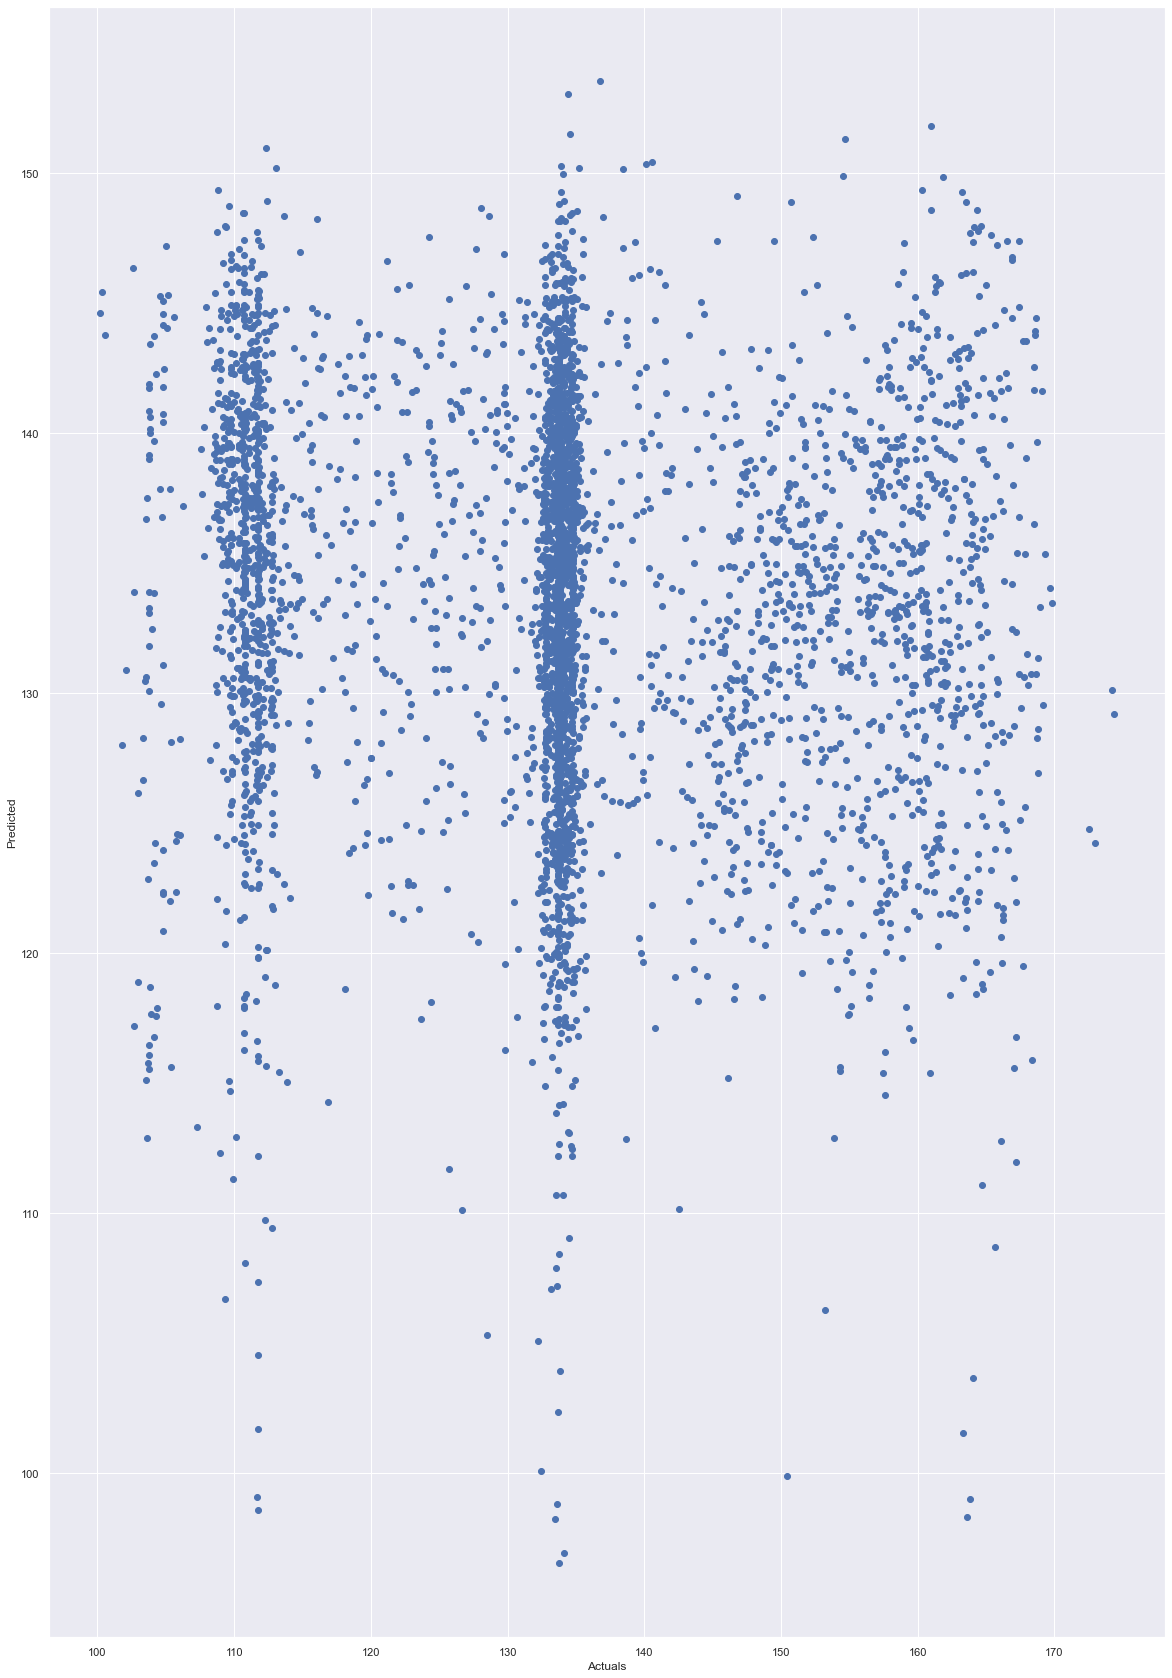

In [67]:
res=res = pd.DataFrame({'Actuals':y_test, 'Predicted':y_predict})
plt.figure(figsize=[20,30])
plt.scatter(x=res['Actuals'], y=res['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')
res.plot(kind='line')

In [66]:
res

Actuals   Predicted
7052    134.06  110.676521
13849   155.98  131.365585
13112   133.77  136.035980
5268    134.02  137.209961
8720    134.14  127.220154
...        ...         ...
8222    133.65  127.245422
4324    133.98  125.549522
2179    133.89  122.586288
1906    154.30  115.627419
5194    134.13  130.640625

[4512 rows x 2 columns]